In [312]:
import pandas as pd


numpy as np
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [401]:
# Read base_logit_diffs.csv into pandas df
# Columns are logit_diffs,is_adversarial,is_adversarial_success,text,confidence
def load_csv(csv_path):
    df = pd.read_csv(csv_path)
    try:
        df["logit_diffs"] = [np.array(eval(','.join(row["logit_diffs"].split()))) for _, row in df.iterrows()]
    except:
        df["logit_diffs"] = [np.array(eval(row["logit_diffs"].replace(";", ","))) for _, row in df.iterrows()]
    
    return df

base = load_csv("base_logit_diffs.csv")
adversarial = load_csv("adversarial_logit_diffs.csv")
far_boundary = load_csv("far_boundary_logit_diffs.csv")
very_far_boundary = load_csv("very_far_boundary_logit_diffs.csv")

base = base[base["confidence"] > 0.5]
low_confidence_base = base[base["confidence"] < 0.8]
high_confidence_base = base[base["confidence"] >= 0.96][base["confidence"] < 0.98]
adversarial = adversarial[adversarial["is_adversarial_success"] == True]
far_boundary = far_boundary[far_boundary["is_adversarial_success"] == True]
very_far_boundary = very_far_boundary[very_far_boundary["is_adversarial_success"] == True]


C:\Users\18147\AppData\Local\Temp\ipykernel_24896\4264612534.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_confidence_base = base[base["confidence"] >= 0.96][base["confidence"] < 0.98]


In [402]:
print("Base: ", base.shape)
print("Low confidence base: ", low_confidence_base.shape)
print("Adversarial: ", adversarial.shape)
print("Far Boundary: ", far_boundary.shape)
print("Very Far Boundary: ", very_far_boundary.shape)

Base:  (1141, 5)
Low confidence base:  (41, 5)
Adversarial:  (1141, 5)
Far Boundary:  (978, 5)
Very Far Boundary:  (2594, 5)


In [403]:
base.head()

,logit_diffs,is_adversarial,is_adversarial_success,text,confidence
0,"[5.77769756, 6.04660416, 6.58319664, 6.6471090...",False,False,I love sci-fi and am willing to put up with a ...,0.998834
1,"[3.95301652, 4.05837154, 4.30562973, 4.3743863...",False,False,"[[Worth]] the entertainment value of a rental,...",0.992764
2,"[3.67921662, 4.28683853, 4.50494146, 4.5423278...",False,False,its a totally average film with a few semi-alr...,0.993402
3,"[6.67397118, 6.75999546, 6.78043842, 6.7812657...",False,False,STAR RATING: ***** Saturday Night **** Friday ...,0.998911
5,"[4.12109089, 4.37859058, 4.40275621, 4.4232211...",False,False,I had high hopes for this one until they chang...,0.993648


In [404]:
low_confidence_base.head()

,logit_diffs,is_adversarial,is_adversarial_success,text,confidence
36,"[-1.70542729, -1.601524, -0.688421011, -0.4923...",False,False,"Beware, My Lovely (1952) Dir: Harry Horner <br...",0.553661
37,"[-2.55561686, -2.33424902, -1.01152647, -0.871...",False,False,The only reason this movie is not given a 1 (a...,0.596867
51,"[0.11793347, 0.26346958, 0.33477068, 0.3676500...",False,False,An [[obscure]] horror show filmed in the Everg...,0.632811
52,"[-0.57994354, -0.53433335, -0.34154001, -0.105...",False,False,This film is about a couple that decides to ta...,0.707484
61,"[-2.39047289, -1.21738672, -0.86218941, -0.714...",False,False,This film features two of my favorite guilty p...,0.775839


In [405]:
adversarial.head()

,logit_diffs,is_adversarial,is_adversarial_success,text,confidence
0,"[-5.32612133, -4.30745554, -2.76181173, -2.256...",True,True,I love sci-fi and am willing to put up with a ...,0.536722
1,"[-2.6117754, -1.91892338, -1.82763648, -1.3369...",True,True,[[Valued]] the entertainment value of a rental...,0.576850
2,"[-4.39465046, -3.51081586, -2.60699081, -1.875...",True,True,its a totally average film with a few semi-alr...,0.684158
3,"[-3.36404133, -2.72102547, -2.60226464, -2.042...",True,True,STAR RATING: ***** Saturday Night **** Friday ...,0.639855
5,"[-3.74621844, -2.14188671, -2.05000734, -2.013...",True,True,I had high hopes for this one until they chang...,0.727778


In [406]:
far_boundary.head()

,logit_diffs,is_adversarial,is_adversarial_success,text,confidence
0,"[-4.78036213, -0.78676641, -0.78151453, -0.770...",True,True,I love sci-fi and am willing to put up with a ...,0.820182
1,"[-0.9892298, -0.76439828, -0.58599585, -0.1404...",True,True,[[Valued]] the entertainment value of a rental...,0.821980
2,"[-3.51798773, -2.54744482, -1.2854538, -0.5369...",True,True,its a [[perfectly]] average film with a few se...,0.886281
3,"[-2.56004381, -2.09954834, -1.1499002, -0.9638...",True,True,STAR RATING: ***** Saturday Night **** Friday ...,0.803042
5,"[-3.51132894, -1.93464386, -1.84330893, -1.697...",True,True,I had high hopes for this one until they chang...,0.804929


In [407]:
very_far_boundary.head()

,logit_diffs,is_adversarial,is_adversarial_success,text,confidence
0,"[0.92202234, 2.4665966, 3.01130247, 3.0762639,...",True,True,I love sci-fi and am willing to put up with a ...,0.993603
1,"[1.8761102, 2.29843092, 2.40339327, 2.42915606...",True,True,[[Valued]] the entertainment value of a rental...,0.977092
2,"[-1.16285348, -0.80349135, -0.49925843, -0.378...",True,True,its a [[unreservedly]] average film with a few...,0.980523
3,"[1.36225986, 1.44813704, 2.44701385, 2.5141725...",True,True,STAR RATING: ***** Saturday Night **** Friday ...,0.983068
5,"[-1.90160322, -0.31403914, 0.85153282, 1.00458...",True,True,I had high hopes for this one until they chang...,0.979893


In [408]:
base_min_wdr = [row[0] for row in base["logit_diffs"]]
adversarial_min_wdr = [row[0] for row in adversarial["logit_diffs"]]
far_boundary_min_wdr = [row[0] for row in far_boundary["logit_diffs"]]
very_far_boundary_min_wdr = [row[0] for row in very_far_boundary["logit_diffs"]]

# Get confidence values
base_conf = base["confidence"]
adversarial_conf = adversarial["confidence"]
far_boundary_conf = far_boundary["confidence"]
very_far_boundary_conf = very_far_boundary["confidence"]

In [409]:
# Get minimum, maximum, and average logit difference for each dataset
def get_stats(nums):
    return {
        "min": min(nums),
        "max": max(nums),
        "avg": sum(nums) / len(nums)
    }
    
base_wdr_stats = get_stats(base_min_wdr)
adversarial_wdr_stats = get_stats(adversarial_min_wdr)
far_boundary_wdr_stats = get_stats(far_boundary_min_wdr)
very_far_boundary_wdr_stats = get_stats(very_far_boundary_min_wdr)

print("Base stats: {}".format(base_wdr_stats))
print("Adversarial stats: {}".format(adversarial_wdr_stats))
print("Far boundary stats: {}".format(far_boundary_wdr_stats))
print("Very far boundary stats: {}".format(very_far_boundary_wdr_stats))

print("------------------")

base_confidence_stats = get_stats(base_conf)
adversarial_confidence_stats = get_stats(adversarial_conf)
far_boundary_confidence_stats = get_stats(far_boundary_conf)
very_far_boundary_confidence_stats = get_stats(very_far_boundary_conf)

print("Base confidence stats: {}".format(base_confidence_stats))
print("Adversarial confidence stats: {}".format(adversarial_confidence_stats))
print("Far boundary confidence stats: {}".format(far_boundary_confidence_stats))
print("Very far boundary confidence stats: {}".format(very_far_boundary_confidence_stats))

Base stats: {'min': -4.65417862, 'max': 7.03589344, 'avg': 4.175261044848916}
Adversarial stats: {'min': -7.00221157, 'max': 2.97048759, 'avg': -2.916490171851009}
Far boundary stats: {'min': -6.87199688, 'max': 3.87959361, 'avg': -1.9627984031758676}
Very far boundary stats: {'min': -6.48826885, 'max': 4.41557646, 'avg': 0.04980027216405307}
------------------
Base confidence stats: {'min': 0.5004374980926514, 'max': 0.9992114305496216, 'avg': 0.9766235650891698}
Adversarial confidence stats: {'min': 0.5000342130661011, 'max': 0.99539977312088, 'avg': 0.6158199094033471}
Far boundary confidence stats: {'min': 0.8000474572181702, 'max': 0.9974886775016784, 'avg': 0.8537294589181131}
Very far boundary confidence stats: {'min': 0.9328851699829102, 'max': 0.9986560940742492, 'avg': 0.9815321792615039}


In [411]:
# print(base["confidence"][base["confidence"] ].describe())

count    1141.000000
mean        0.976624
std         0.072032
min         0.500437
25%         0.993715
50%         0.998046
75%         0.998790
max         0.999211
Name: confidence, dtype: float64


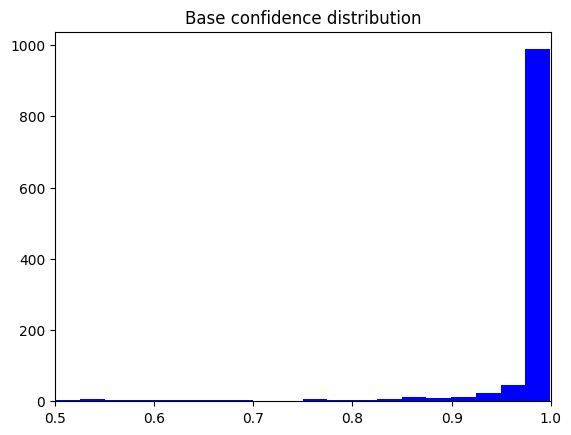

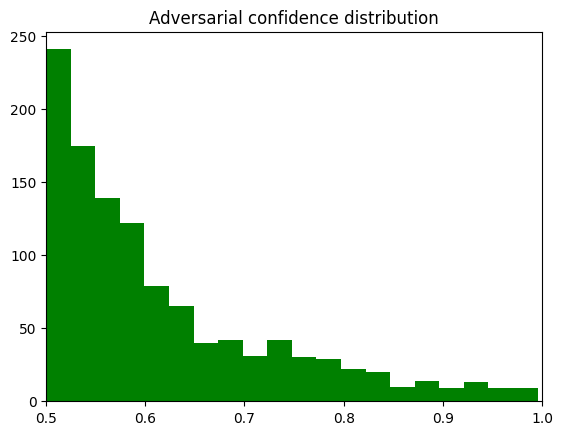

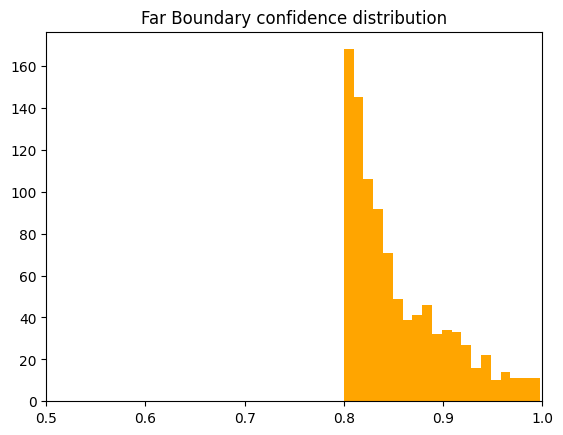

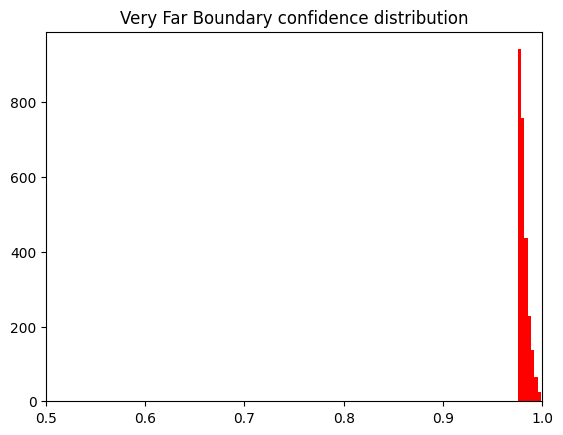

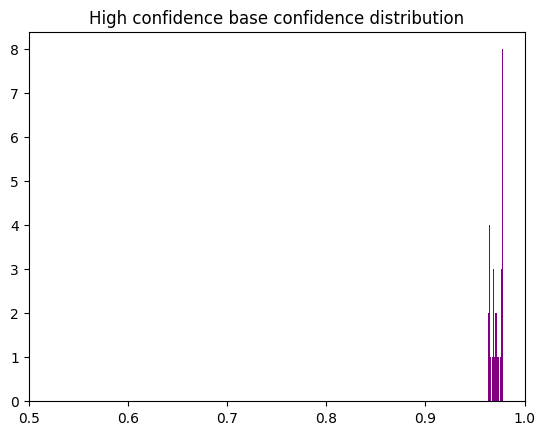

In [410]:
# plot distribution of confidence values    
def plot_confidence_distribution(confidence_values, color = "blue", title = ""):
    # Histogram of percentage of confidence values
    plt.hist(confidence_values, bins = 20, color = color)

    # set x limits to 0.5 to 1.0
    plt.xlim(0.5, 1.0)
    
    plt.title(title)
    # plt.legend()
    plt.show()
    
plot_confidence_distribution(base_conf, color = "blue", title = "Base confidence distribution")
# high_confidence_base = base[base["confidence"] > 0.977]
plot_confidence_distribution(adversarial_conf, color = "green", title = "Adversarial confidence distribution")
plot_confidence_distribution(far_boundary_conf, color = "orange", title = "Far Boundary confidence distribution")
plot_confidence_distribution(very_far_boundary_conf, color = "red", title = "Very Far Boundary confidence distribution")
plot_confidence_distribution(high_confidence_base["confidence"], color = "purple", title = "High confidence base confidence distribution")

In [381]:
# Train an svm to predict whether an example is adversarial or not using wdrs

from sklearn.metrics import mean_squared_error


def train_model(base_set, adversarial_set, percent_train = 0.8, classification = True, auto_balance = True):
    # Training set is first 80% of base examples and first 80% of adversarial examples
    # Test set is last 20% of base examples and last 20% of adversarial examples

    base_train_size = int(len(base_set) * percent_train)
    adversarial_train_size = int(len(adversarial_set) * percent_train)
    
    base_test_size = len(base_set) - base_train_size
    adversarial_test_size = len(adversarial_set) - adversarial_train_size
    
    if auto_balance:
        base_train_size = min(base_train_size, adversarial_train_size)
        base_test_size = min(base_test_size, adversarial_test_size)
        
        adversarial_train_size = base_train_size
        adversarial_test_size = base_test_size

    # Get training set
    base_train = base_set["logit_diffs"][:base_train_size]
    adversarial_train = adversarial_set["logit_diffs"][:adversarial_train_size]

    # concatenate and process
    train_x = pd.concat([base_train, adversarial_train])
    train_x = [list(x) for x in train_x]
    if classification:
        train_y = [0] * len(base_train) + [1] * len(adversarial_train)
    else:
        train_y = base["confidence"][:len(base_train)].tolist() + adversarial["confidence"][:len(adversarial_train)].tolist()

    # Get test set
    base_test = base["logit_diffs"][len(base_train):]
    adversarial_test = adversarial["logit_diffs"][len(adversarial_train):]
    
    print("Number of base train examples: {}, number of adversarial train examples: {}".format(len(base_train), len(adversarial_train)))
    print("Number of base test examples: {}, number of test adversarial examples: {}".format(len(base_test), len(adversarial_test)))

    # concatenate and process
    test_x = pd.concat([base_test, adversarial_test])
    test_x = [list(x) for x in test_x]
    if classification:
        test_y = [0] * len(base_test) + [1] * len(adversarial_test)
    else:
        test_y = base["confidence"][len(base_train):].tolist() + adversarial["confidence"][len(adversarial_train):].tolist()
    
    if classification:
        # Train svm
        clf = svm.SVC()
    else:
        # Train svm
        clf = svm.SVR()


    clf.fit(train_x, train_y)

    # Test svm
    predictions = clf.predict(test_x)

    if classification:
        # Get accuracy
        base_correct = 0
        adversarial_correct = 0
        for i in range(len(predictions)):
            if predictions[i] == test_y[i]:
                if test_y[i] == 0:
                    base_correct += 1
                else:
                    adversarial_correct += 1
                
        base_accuracy = base_correct / len(base_test)
        adversarial_accuracy = adversarial_correct / len(adversarial_test)
        
        print("Base accuracy: {}".format(base_accuracy))
        print("Adversarial accuracy: {}".format(adversarial_accuracy))
    
        print("Overall accuracy: {}".format((base_correct + adversarial_correct) / (len(base_test) + len(adversarial_test))))
    
    else:        
        # Difference between predictions and actual values
        
        # Mean squared error
        base_mse = mean_squared_error(test_y[:len(base_test)], predictions[:len(base_test)])
        print("Base MSE: {}".format(base_mse))
        
        # Plot distribution of differences
        plt.hist([abs(predictions[i] - test_y[i]) for i in range(len(base_test))], bins = 50, color = "blue")
        plt.title("Difference between predictions and actual values for base examples")
    
        plt.show()
        
        aversarial_mse = mean_squared_error(test_y[len(base_test):], predictions[len(base_test):])
        print("Adversarial MSE: {}".format(aversarial_mse))
        
        plt.hist([abs(predictions[i] - test_y[i]) for i in range(len(base_test), len(base_test) + len(adversarial_test))], bins = 50, color = "green")
        plt.title("Difference between predictions and actual values for adversarial examples")



    return clf, train_x, train_y, test_x, test_y

# clf = train_model(base, adversarial, classification = False)
# print(len(high_confidence_base), len(very_far_boundary))
clf, train_x, train_y, test_x, test_y = train_model(base, very_far_boundary, classification = True)

Number of base train examples: 912, number of adversarial train examples: 912
Number of base test examples: 229, number of test adversarial examples: 229
458 458
Base accuracy: 0.851528384279476
Adversarial accuracy: 0.034934497816593885
Overall accuracy: 0.4432314410480349


In [386]:
# Baseline using only first logit difference
def threshold_baseline(test_x, test_y, threshold, index = 0, exclude_zeros = True, verbose = False):
    correct_base = 0
    correct_adversarial = 0
    total_base = 0
    total_adversarial = 0
    for i in range(len(test_x)):
        if exclude_zeros and test_x[i][index] == 0:
            continue
        if test_x[i][index] <= threshold:
            if test_y[i] == 1:
                correct_adversarial += 1
                total_adversarial += 1
            else:
                total_base += 1
        else:
            if test_y[i] == 0:
                correct_base += 1
                total_base += 1
            else:
                total_adversarial += 1
    
    if verbose:
        if total_base == 0:
            print("No base examples")
        else:
            print("Base accuracy: {}".format(correct_base / total_base))
            
        if total_adversarial == 0:
            print("No adversarial examples")
        else:
            print("Adversarial accuracy: {}".format(correct_adversarial / total_adversarial))
        print("correct_base: {}, correct_adversarial: {}, total_base: {}, total_adversarial: {}".format(correct_base, correct_adversarial, total_base, total_adversarial))
    
    return (correct_base + correct_adversarial) / (total_base + total_adversarial)

def get_best_threshold(test_x, test_y, index = 0, abs_precision = 0.0001):
    # Ternary search for best threshold
    low = min([x[index] for x in test_x])
    high = max([x[index] for x in test_x])
    while abs(high - low) > abs_precision:
        # print(low, high)
        low_third = low + (high - low) / 3
        high_third = high - (high - low) / 3
        
        if threshold_baseline(test_x, test_y, low_third, index) < threshold_baseline(test_x, test_y, high_third, index):
            low = low_third
        else:
            high = high_third
            
    best_threshold = (low + high) / 2
    # REMINDER NOT TO USE THIS FOR ACTUAL ACCURACY, NEED INDEPENDET DATASET

    return best_threshold

threshold, accuracy = get_best_threshold(train_x, train_y, index = 0)
print("On training set, best threshold: {}, accuracy: {}".format(threshold, accuracy))
# test_acc = threshold_baseline(test_x, test_y, index = 0, threshold = threshold, verbose = True)
other_test_x = base["logit_diffs"].tolist()
other_test_y = [0] * len(other_test_x)


test_acc = threshold_baseline(other_test_x, other_test_y, index = 0, threshold = threshold, verbose = True)
print("On test set, accuracy: {}".format(test_acc))

On training set, best threshold: 2.775972652951419, accuracy: 0.8514254385964912
Base accuracy: 0.7370727432077125
No adversarial examples
correct_base: 841, correct_adversarial: 0, total_base: 1141, total_adversarial: 0
On test set, accuracy: 0.7370727432077125


In [387]:
# Get mean and std given index
def get_mean_std(test_x, index = 0):
    mean = np.mean([x[index] for x in test_x])
    std = np.std([x[index] for x in test_x])
    count_0 = 0
    for x in test_x:
        if x[index] == 0:
            count_0 += 1
    print("excluding zeroes mean: ", np.mean([x[index] for x in test_x if x[index] != 0]))
    print("excluding zeroes std: ", np.std([x[index] for x in test_x if x[index] != 0]))
    return mean, std, count_0

print(get_mean_std(adversarial["logit_diffs"], 0))
print(get_mean_std(base["logit_diffs"], 0))

excluding zeroes mean:  -2.9164901718510077
excluding zeroes std:  1.4014284484451467
(-2.9164901718510077, 1.4014284484451467, 0)
excluding zeroes mean:  4.175261044848922
excluding zeroes std:  2.576307740290701
(4.175261044848922, 2.576307740290701, 0)


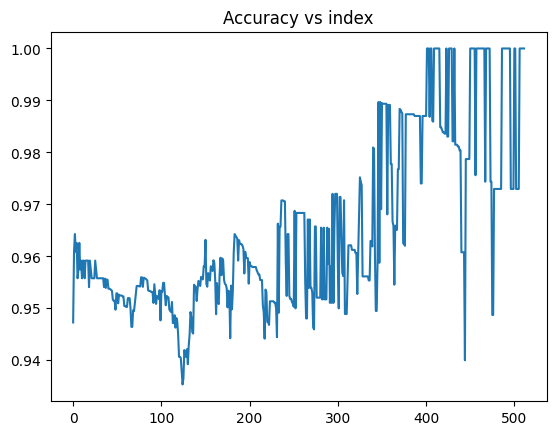

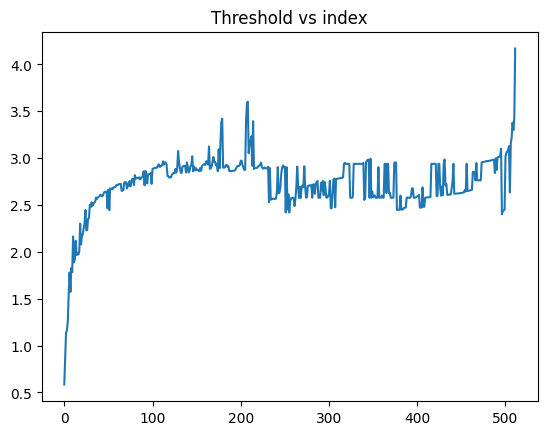

In [ ]:
thresholds = []
accuracies = []
for index in range(512):
    best_threshold_val, best_accuracy = get_best_threshold(train_x, train_y, index = index)
    best_accuracy = threshold_baseline(test_x, test_y, best_threshold_val, index)
    # print("Best threshold for index {}: {}".format(index, best_threshold_val))
    # print("Best accuracy for index {}: {}".format(index, best_accuracy))
    thresholds.append(best_threshold_val)
    accuracies.append(best_accuracy)

# Plot accuracy vs index
plt.plot(accuracies)
plt.title("Accuracy vs index")
plt.show()

# Plot threshold vs index
plt.plot(thresholds)
plt.title("Threshold vs index")
plt.show()

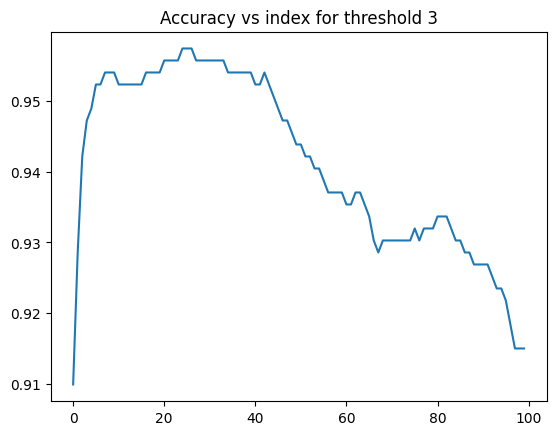

In [ ]:
def plot_accuracy_for_threshold(test_x, test_y, threshold, index_range = [0, 512]):
    accuracies = []
    for index in range(index_range[0], index_range[1]):
        accuracies.append(threshold_baseline(test_x, test_y, threshold, index))
        
    plt.plot(accuracies)
    plt.title("Accuracy vs index for threshold of {}".format(threshold))
    
    plt.show()
    
plot_accuracy_for_threshold(test_x, test_y, 3.0, index_range = [0, 100])

In [ ]:
def simulate_accuracy(test_x, test_y, threshold, random_choices = 10, iterations = 3):
    """
    Simulate accuracy by choosing random_choices number of random indices, and if any of them are below threshold, then predict 1
    """
    adversarial_correct = 0
    adversarial_total = 0
    
    base_correct = 0
    base_total = 0
    for _ in range(iterations):
        for wdrs, pred in zip(test_x, test_y):
            # Choose random_choices number of random indices, only choose non_zero indices
            indices = []
            for _ in range(random_choices):
                index = random.randint(0, 511)
                while wdrs[index] == 0 or index in indices:
                    index = random.randint(0, 511)
                indices.append(index)
            
            # print(indices, min([wdrs[i] for i in indices]), min([wdrs[i] for i in indices]) <= threshold)
            if min([wdrs[i] for i in indices]) <= threshold:
                if pred == 1:
                    adversarial_correct += 1
                adversarial_total += 1
            else:
                if pred == 0:
                    base_correct += 1
                base_total += 1
    return adversarial_correct / adversarial_total, base_correct / base_total

simulate_accuracy(test_x, test_y, 2.5, random_choices = 5, iterations = 100)

(0.9435902901755976, 0.9770579662451224)

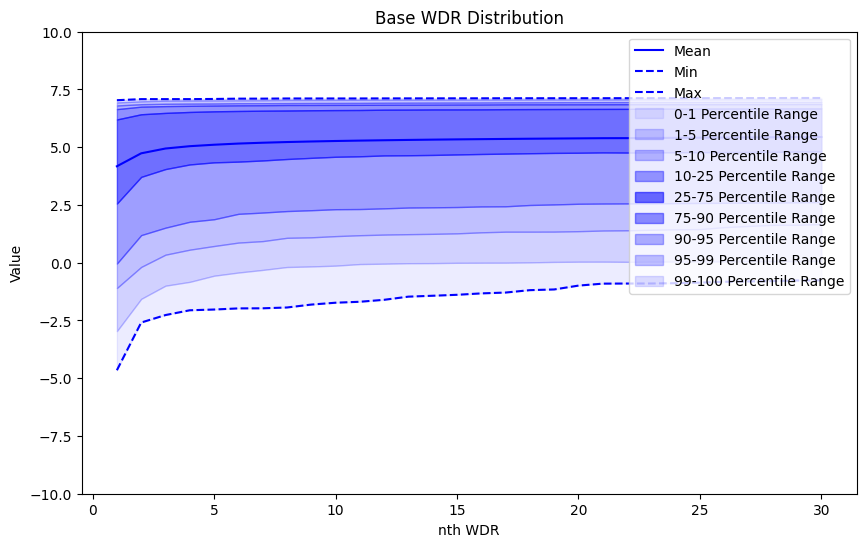

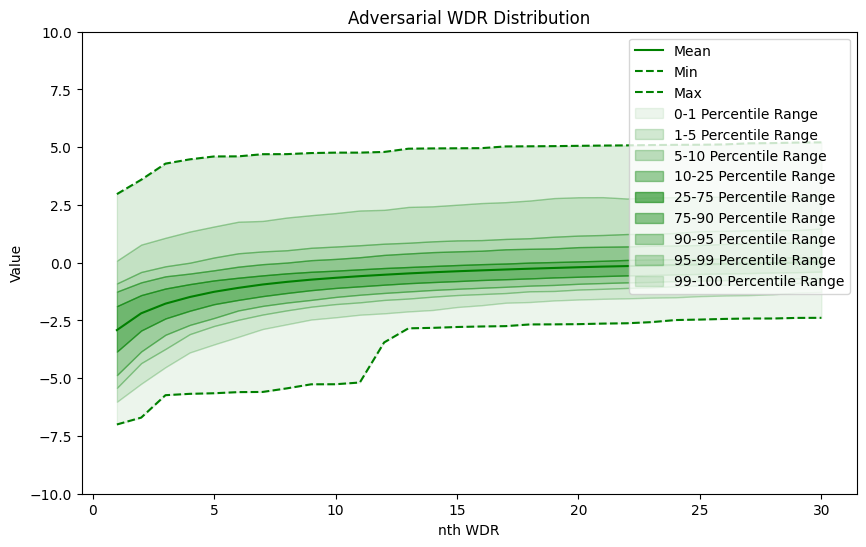

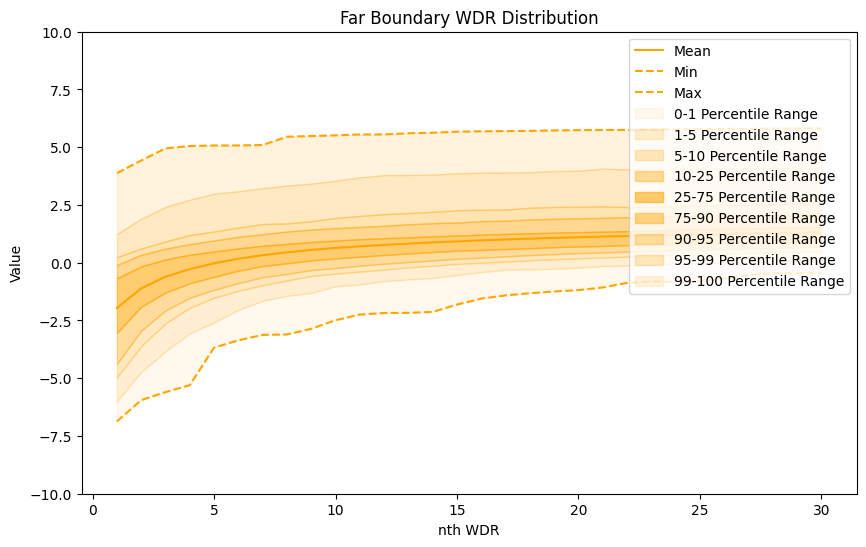

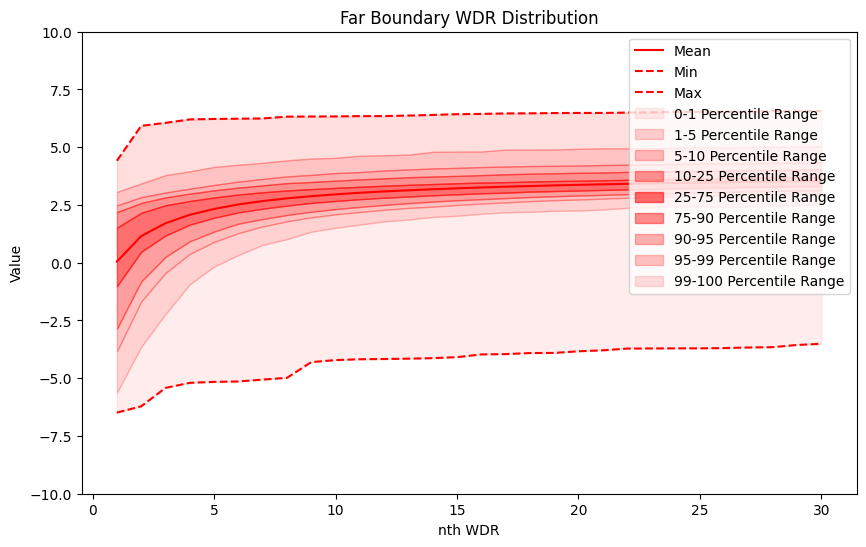

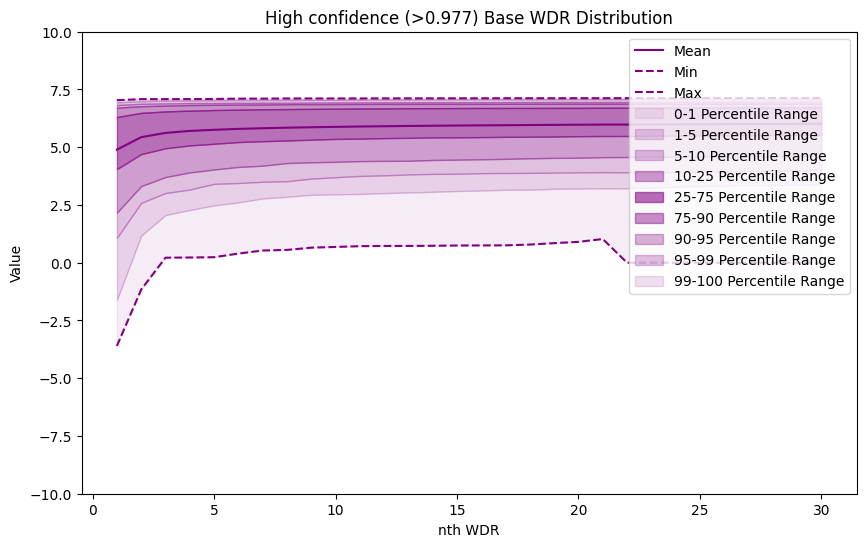

In [390]:
def plot_wdr(data, first_n = 512, color = "blue", title=""):
    # Your data: A 2D array where each row is an instance of the distribution
    data = np.stack(data)  # Replace this with your actual data

    data = data[:, :first_n]

    # Calculate mean and standard deviation across instances
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Create x-axis values
    x_values = np.arange(1, len(data[0]) + 1)

    # Plot the mean and standard deviation
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, mean, color = color, label='Mean')
    plt.fill_between(x_values, mean - std, mean + std, color = color, alpha=0.2, label='Standard Deviation')

    plt.xlabel('Ordered Points')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()
    
def better_plot_wdr(data, percentiles = [0,1,5,10,25,75,90,95,99,100], first_n = 512, color = "blue", title="", y_range = None, alphas = None):
    data = np.stack(data)  # Replace this with your actual data

    data = data[:, :first_n]
    
    
    percentile_values = [np.percentile(data, p, axis=0) for p in percentiles]
    # Increasing then decreasing alphas
    alpha_lin = np.linspace(0.05, 0.5, len(percentiles) // 2) 
    alpha_lin = np.concatenate([alpha_lin, alpha_lin[::-1]])
    
    # percentile_values = np.percentile(data, 25, axis=0)
    x_values = np.arange(1, data.shape[1] + 1)



    plt.figure(figsize=(10, 6))

    # Plot line for mean

    mean = np.mean(data, axis=0)
    plt.plot(x_values, mean, color = color, label='Mean')

    # Plot dotted lines for min and max
    data_min = np.min(data, axis=0)
    data_max = np.max(data, axis=0)
    plt.plot(x_values, data_min, color=color, linestyle='--', label='Min')
    plt.plot(x_values, data_max, color=color, linestyle='--', label='Max')

    for i, (p_low, p_high) in enumerate(zip(percentiles[:-1], percentiles[1:])):
        # Calculate alpha based on percentile difference
        if alphas is None:
            alpha = (1 - 1 / math.e ** (1 * ((p_high - p_low) / 100)))**(1/2)
            alpha += alpha_lin[i]
            alpha /= 2
        else:
            alpha = alphas[i]

        # Fill the percentile range
        plt.fill_between(x_values, percentile_values[i], percentile_values[i + 1], color=color, alpha=alpha, label=f'{p_low}-{p_high} Percentile Range')
    # Set y limits
    if y_range is not None:
        plt.ylim(y_range)
        

    plt.xlabel('nth WDR')
    plt.ylabel('Value')
    plt.title(title)
    # Legend in top right corner
    plt.legend(loc='upper right')
    plt.show()

# plot_wdr(base["logit_diffs"], first_n=512, title="Base WDR Distribution")
better_plot_wdr(base["logit_diffs"], first_n=30, color = 'blue', title="Base WDR Distribution", y_range=[-10, 10])
better_plot_wdr(adversarial["logit_diffs"], color = 'green', first_n=30, title="Adversarial WDR Distribution", y_range=[-10, 10])
better_plot_wdr(far_boundary["logit_diffs"], color = 'orange', first_n=30, title="Far Boundary WDR Distribution", y_range=[-10, 10])
better_plot_wdr(very_far_boundary["logit_diffs"], color = 'red', first_n=30, title="Far Boundary WDR Distribution", y_range=[-10, 10])

better_plot_wdr(high_confidence_base["logit_diffs"], color = 'purple', first_n=30, title="High confidence (>0.977) Base WDR Distribution", y_range=[-10, 10])

# print(len(base[base["confidence"] < 0.8]))


